In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from dl_portfolio.data import load_data
import pickle
import os
import time

from dl_portfolio.torsion import get_min_torsion_bets

data1, asset1 = load_data("dataset1")
data2, asset2 = load_data("dataset2")

# Some useful functions

In [2]:
def load_all_backtest_result(nmf_dir, dataset):
    # Load Market budget
    if dataset == 'dataset1':
        market_budget = pd.read_csv('data/dataset1/market_budget_dataset1.csv', index_col=0)
        cryptos = ['BTC', 'DASH', 'ETH', 'LTC', 'XRP']
        market_budget = pd.concat([market_budget, pd.DataFrame(np.array([['crypto', 1]] * len(cryptos)),
                                                               index=cryptos,
                                                               columns=market_budget.columns)])
        # market_budget = market_budget.drop('CRIX')
        market_budget['rc'] = market_budget['rc'].astype(int)
        market_budget.drop("CRIX", inplace=True)
    elif dataset == 'dataset2':
        market_budget = pd.read_csv('data/dataset2/market_budget_dataset2.csv', index_col=0)
        market_budget['rc'] = market_budget['rc'].astype(int)
    else:
        raise NotImplementedError()
         
    cv_port_weights = pd.read_pickle(f'{nmf_dir}/cv_port_weights.p')    
    cv_results = pd.read_pickle(f"{nmf_dir}/cv_results.p")

    return cv_results, cv_port_weights, market_budget


# Save directory

In [3]:
SAVE=False
save=SAVE
savedir = "paper_result_update/nmf"
if save:
    if not os.path.isdir(savedir):
        os.makedirs(savedir)
perf_nmf_dir_1 = "./performance/test_final_models/nmf/dataset1_20230518_160622"
perf_nmf_dir_2 = "./performance/test_final_models/nmf/dataset2_20230518_160843"

# Load backtest result

In [4]:
cv_results1, cv_port_weights1, market_budget1 = load_all_backtest_result(perf_nmf_dir_1,
                                                                   "dataset1")
cv_dates1 = [cv_results1[0][cv]["returns"].index[0] for cv in cv_results1[0].keys()]
loading_shape1 = np.array([cv_results1[0][i]["loading"].shape[-1] for i in range(len(cv_dates1))])

cv_results2, cv_port_weights2, market_budget2 = load_all_backtest_result(perf_nmf_dir_2,
                                                                   "dataset2")
cv_dates2 = [cv_results2[0][cv]["returns"].index[0] for cv in cv_results2[0].keys()]
loading_shape2 = np.array([cv_results2[0][i]["loading"].shape[-1] for i in range(len(cv_dates2))])


# Dataset 1

0.006744317213694255
0.007923599084218342


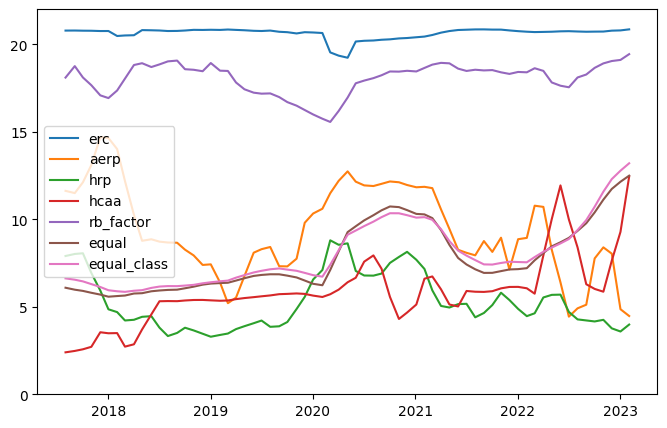

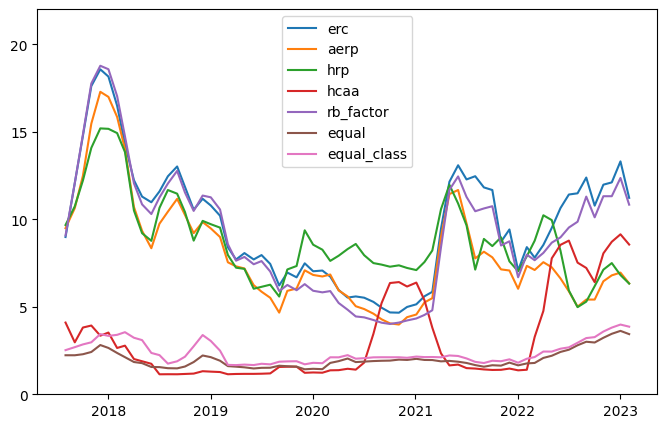

In [5]:
save = False
t1 = time.time()
rcs_a_1, n_bets_a_1 = get_min_torsion_bets(cv_results1, 
                                           cv_port_weights1,
                                           market_budget1,
                                           level="asset")
t2 = time.time()
print((t2-t1)/60)


t1 = time.time()
rcs_f_1, n_bets_f_1 = get_min_torsion_bets(cv_results1, cv_port_weights1, market_budget1, level="factor")
t2 = time.time()
print((t2-t1)/60)

plt.figure(figsize=(8, 5))
plt.plot(n_bets_a_1.rolling(3).mean())
plt.ylim(0, 22)
plt.yticks(range(0, 22, 5), range(0, 22, 5))
if save:
    plt.savefig(f"{savedir}/min_torsion_a_in_1.png", transparent=True, bbox_inches="tight")
else:
    plt.legend(n_bets_a_1.columns)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(n_bets_f_1.rolling(3).mean()) #  / loading_shape1.reshape(-1,1)
plt.ylim(0, 22)
plt.yticks(range(0, 22, 5), range(0, 22, 5))
if save:
    plt.savefig(f"{savedir}/min_torsion_f_in_1.png", transparent=True, bbox_inches="tight")
else:
    plt.legend(n_bets_a_1.columns)
plt.show()

## Dataset 2

In [6]:
t1 = time.time()
rcs_a_2, n_bets_a_2 = get_min_torsion_bets(cv_results2, cv_port_weights2, market_budget2, level="asset")
t2 = time.time()
print((t2-t1)/60)

t1 = time.time()
rcs_f_2, n_bets_f_2 = get_min_torsion_bets(cv_results2, cv_port_weights2, market_budget2, level="factor")
t2 = time.time()
print((t2-t1)/60)

0.0331317146619161
0.03331916332244873


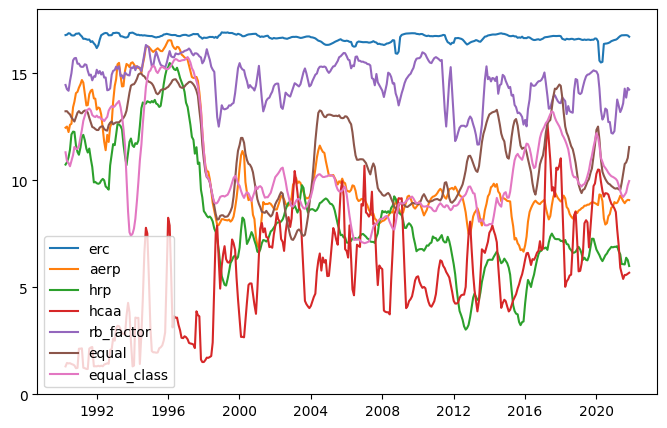

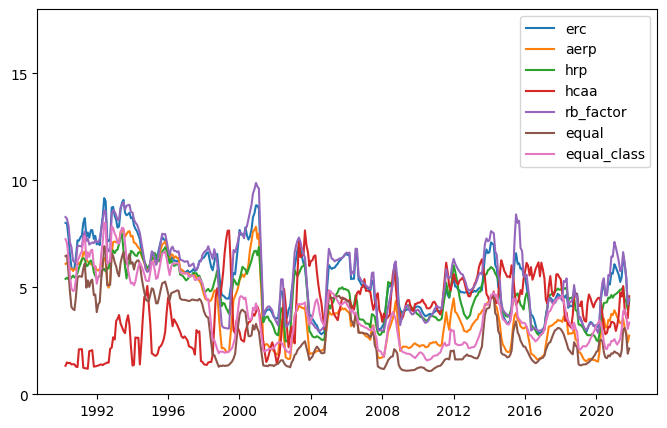

In [7]:
save = False
plt.figure(figsize=(8, 5))
plt.plot(n_bets_a_2.rolling(3).mean())
plt.ylim(0, 18)
plt.yticks(range(0, 18, 5), range(0, 18, 5))
if save:
    plt.savefig(f"{savedir}/min_torsion_a_in_2.png", transparent=True, bbox_inches="tight")
else:
    plt.legend(n_bets_a_1.columns)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(n_bets_f_2.rolling(3).mean())
plt.ylim(0, 18)
plt.yticks(range(0, 18, 5), range(0, 18, 5))
if save:
    plt.savefig(f"{savedir}/min_torsion_f_in_2.png", transparent=True, bbox_inches="tight")
else:
    plt.legend(n_bets_a_1.columns)
plt.show()